In [13]:
import pandas_datareader as pdr 
import datetime as dt 
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import pandas as pd  

In [2]:
df = pdr.DataReader('URTH', data_source='yahoo', start = dt.date(2020, 1, 2), end = dt.date(2022, 1, 1))

<AxesSubplot:xlabel='Date'>

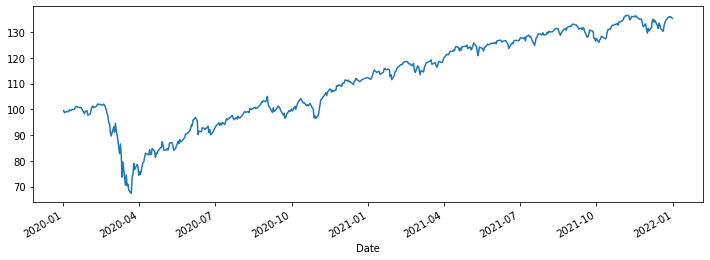

In [3]:
df['Close'].plot(figsize = (12, 4))

In [4]:
# group data to weekly
df_weekly = df['Close'].resample('W').last().pct_change().dropna()
df_weekly.head()

Date
2020-01-12    0.007600
2020-01-19    0.017297
2020-01-26   -0.010874
2020-02-02   -0.023286
2020-02-09    0.029674
Freq: W-SUN, Name: Close, dtype: float64

<AxesSubplot:xlabel='Date'>

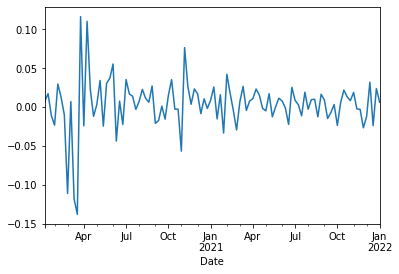

In [5]:
df_weekly.plot()

In [14]:
# check for stationarity
pd.Series(adfuller(df_weekly, regresults = False), index = ['adf', 'p-value', 'used_lag', 'n_obs', 'critical_values', 'max_ic'])

adf                                                        -6.883536
p-value                                                          0.0
used_lag                                                           1
n_obs                                                            102
critical_values    {'1%': -3.4961490537199116, '5%': -2.890320963...
max_ic                                                   -439.485392
dtype: object

In [7]:
# let's model three variance regimes 

# Fit the model
mod_kns = sm.tsa.MarkovRegression(df_weekly, k_regimes=3, trend='n', switching_variance=True)
res_kns = mod_kns.fit()
res_kns.summary()

/Users/pasin/Codes/Python/_investments/env/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                        Markov Switching Model Results                        
==============================================================================
Dep. Variable:                  Close   No. Observations:                  104
Model:               MarkovRegression   Log Likelihood                 237.528
Date:                Sat, 19 Feb 2022   AIC                           -457.057
Time:                        11:17:56   BIC                           -433.257
Sample:                    01-12-2020   HQIC                          -447.415
                         - 01-02-2022                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0003   8.63e-05      3.461      0.001       0.000       0.000
                             Regime 1 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0007      0.001      1.063      0.288      -0.001       0.002
                             Regime 2 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0061      0.003      2.255      0.024       0.001       0.011
                         Regime transition parameters                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
p[0->0]        0.9607        nan        nan        nan         nan         nan
p[1->0]        0.5706      0.515      1.109      0.267      -0.438       1.579
p[2->0]     1.018e-06      0.613   1.66e-06      1.000      -1.201       1.201
p[0->1]        0.0060      0.035      0.174      0.862      -0.062       0.074
p[1->1]        0.0005        nan        nan        nan         nan         nan
p[2->1]        0.3947      1.096      0.360      0.719      -1.752       2.542
==============================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
"""

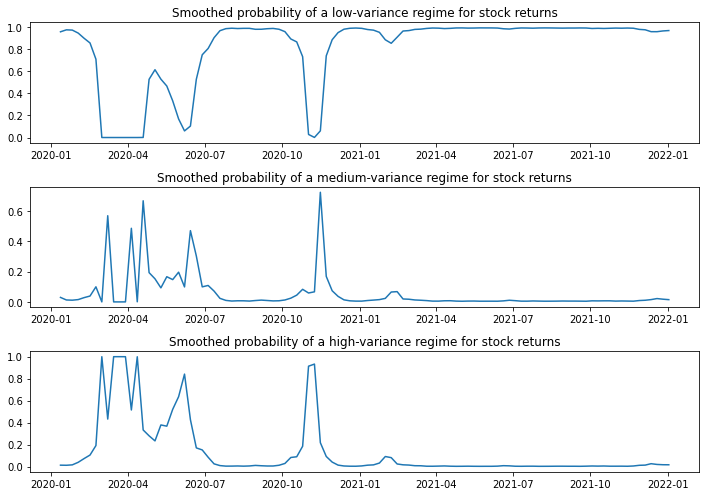

In [16]:
# Plot smooth probabilities of each regime
fig, axes = plt.subplots(3, figsize=(10,7))

ax = axes[0]
ax.plot(res_kns.smoothed_marginal_probabilities[0])
ax.set(title='Smoothed probability of a low-variance regime for stock returns')

ax = axes[1]
ax.plot(res_kns.smoothed_marginal_probabilities[1])
ax.set(title='Smoothed probability of a medium-variance regime for stock returns')

ax = axes[2]
ax.plot(res_kns.smoothed_marginal_probabilities[2])
ax.set(title='Smoothed probability of a high-variance regime for stock returns')

fig.tight_layout()